In [19]:
import burst_detect as bd
import os
from glob import glob
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/stop_duration_nooutliers.csv')

In [3]:
len(df)

1628

In [4]:
df['new_start'] = df.apply(lambda row: row['prev_phon_start'] if row['prev_phon'] == 'sp' else row['phon_start'], axis = 1)

In [5]:
df_stops = df.query('onset in ["tt", "kk", "t", "k"]').reset_index(drop = True)

In [6]:
len(df_stops)

1414

In [10]:
b_time = []
b_strength = []

for i, row in df_stops.iterrows():
    
    time, strength = bd.burst('../files/' + row['fname'].replace('.TextGrid', '.wav').replace('aligned','unaligned'), row['new_start'], row['phon_end'])
    
    b_time.append(time)
    b_strength.append(strength)

In [11]:
df_stops['burst_time'] = b_time
df_stops['burst_strength'] = b_strength

df_stops = df_stops.drop('Unnamed: 0', axis = 1)

df_stops.to_csv('../data/stop_targets.csv', index = False)

# Visualize

In [12]:
burst_df = pd.read_csv('../data/stop_targets.csv')

In [13]:
burst_df['VOT'] = (burst_df['phon_end'] - burst_df['burst_time'])*1000
burst_df['closure_duration'] = (burst_df['burst_time'] - burst_df['new_start'])*1000

In [14]:
burst_df.query('burst_time == -1').onset.value_counts()

k     121
tt     27
t      11
kk      7
Name: onset, dtype: int64

In [15]:
burst_df = burst_df.query('burst_time != -1')

In [16]:
burst_df.onset.value_counts()

k     551
t     327
tt    313
kk     57
Name: onset, dtype: int64

In [17]:
burst_df.groupby('onset')['burst_strength'].agg(['mean','std'])

,mean,std
onset,,
k,3.526487,2.380215
kk,4.226658,2.372321
t,5.081426,2.820164
tt,5.587894,2.623796


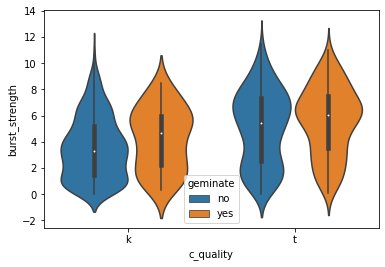

In [20]:
sns.violinplot(data = burst_df, x = 'c_quality', y = 'burst_strength', hue = 'geminate')

plt.savefig('../img/strength.png')

In [21]:
burst_df.groupby('onset')['VOT'].agg(['mean','std'])

,mean,std
onset,,
k,56.978335,29.224933
kk,25.787281,25.679170
t,42.913417,23.456924
tt,13.650160,18.585165


In [22]:
burst_df.groupby('onset')['closure_duration'].agg(['mean','std'])

,mean,std
onset,,
k,77.214043,35.298144
kk,108.247807,33.914700
t,87.147745,31.211696
tt,108.075080,39.880248


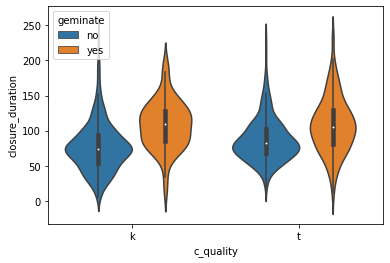

In [23]:
sns.violinplot(data = burst_df, x = 'c_quality', y = 'closure_duration', hue = 'geminate')

plt.savefig('../img/closure.png')

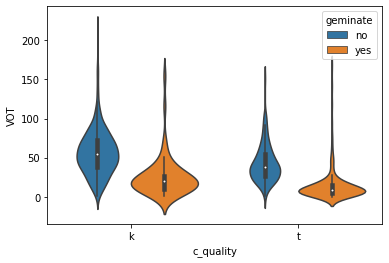

In [24]:
sns.violinplot(data = burst_df, x = 'c_quality', y = 'VOT', hue = 'geminate')

plt.savefig('../img/vot.png')